In [1]:
from dataloader import load_CIFAR10   #load cifa10data
from LogisticRegression import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl




In [2]:
def plot(accuracy_per_class, accuracy, color, names):
    ind = np.arange(10)
    width = 0.5
    fig, ax = plt.subplots()
    rects = ax.bar(ind, accuracy_per_class, width, color='b')
    ax.set_ylabel('Accuracy')
    ax.set_title('LR on %s CIFAR-10 accuracy per class, average accuracy = %f' % (color, accuracy))
    ax.set_xticks(ind)
    ax.set_xticklabels(names, rotation='vertical')
    plt.show()



In [3]:


def get_accuracy(predict, yte):
    accuracy_per_class = [0.] * 10
    for i in range(predict.shape[0]):
        if predict[i] == yte[i]:
            accuracy_per_class[yte[i]] += 1.
    for i in range(10):
        accuracy_per_class[i] /= 1000.0
    accuracy = np.sum(predict == yte) / 10000.0
    return accuracy_per_class, accuracy

def pca(xtrain,xtest):
    
    nPrincipalComponents = 101
    data = xtrain
    avg = np.mean(data,axis=1).reshape(data.shape[0],1)
    data -= avg
    
    c = np.cov(data.T)
    print c.shape
    evals,evecs = np.linalg.eig(c)
    print data.shape
    indices = np.argsort(evals)
    indices = indices[::-1]
    #indices = indices[:201]
    evecs = evecs[:,indices]
    evals = evals[indices]
    
    #Normalise
    
    #for i in range(np.shape(evecs)[1]):
        
    x = np.dot(xtrain,evecs[:,:nPrincipalComponents])
    
    y = np.dot(xtest,evecs[:,:nPrincipalComponents])
    
    return x,y

(3072, 3072)
(50000, 3072)


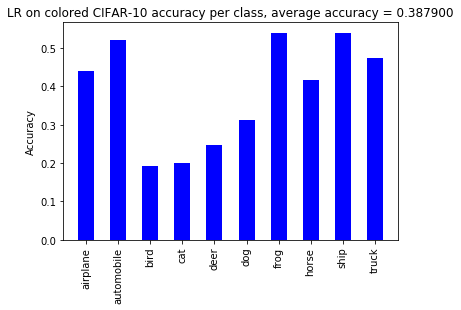

In [4]:

cifar10_dir ='/home/usr/Downloads/cifar-10-batches-py'
             
x_train,y_train,x_test,y_test,names = load_CIFAR10(cifar10_dir)


x_train = np.reshape(x_train,(x_train.shape[0],-1))
x_test  = np.reshape( x_test, (x_test.shape[0],-1))

x_train_pca,x_test_pca = pca(x_train,x_test)

# find hyperparameters that work best on the validation set
validation_accuracies = []

  
  # use a particular value of k and evaluation on validation data
lg = LogisticRegression()
lg.train(x_train_pca, y_train)
    # here we assume a modified NearestNeighbor class that can take a k as input

Yval_predict = lg.predict(x_test_pca)

accuracy_per_class, accuracy = get_accuracy(Yval_predict, y_test)

plot(accuracy_per_class, accuracy, 'colored', names)
#acc = np.mean(Yval_predict[] == y_test[])

